<module 'matplotlib.pyplot' from '/home/czhou/anaconda3/envs/py311/lib/python3.11/site-packages/matplotlib/pyplot.py'>

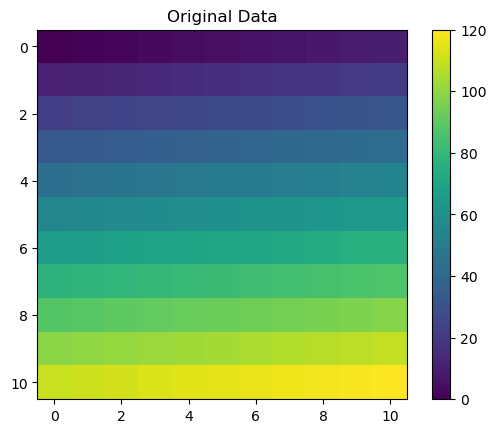

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xesmf as xe

data = np.arange(121).reshape(11,11)
plt.figure
plt.imshow(data)
plt.colorbar()
plt.title("Original Data")
plt.show()

In [4]:
# use dictionary to define the grid
grid_in = {
    "lon": np.linspace(0, 10, 11),
    "lat": np.linspace(0, 10, 11)
    }
grid_out = {
    "lon": np.linspace(-20, 60, 51), 
    "lat": np.linspace(-10, 30, 41)
    }

regridder = xe.Regridder(grid_in, grid_out, "bilinear")
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_11x11_41x51.nc 
Reuse pre-computed weights? False 
Input grid shape:           (11, 11) 
Output grid shape:          (41, 51) 
Periodic in longitude?      False

In [6]:
data_out = regridder(data)  # regrid a basic numpy array
data_out.shape
data_out

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(41, 51))

Text(0.5, 1.0, 'Regridded Data')

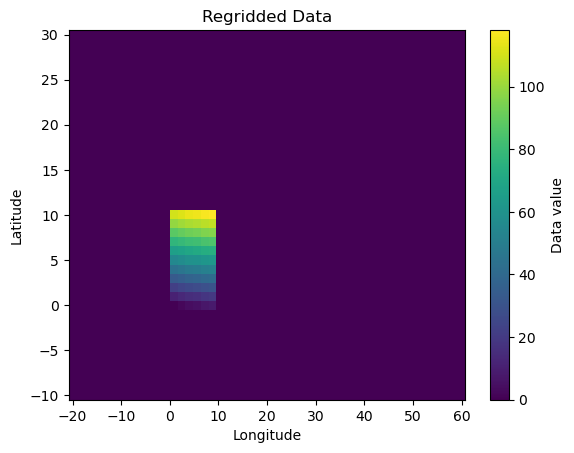

In [10]:
plt.figure()
plt.pcolormesh(grid_out['lon'],grid_out['lat'],data_out)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Data value')
plt.title('Regridded Data')
